# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [187]:
#Imports:
import numpy as np
import pandas as pd 
import time
import seaborn as sns
import matplotlib.pyplot as plt


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [188]:
%ls

starter-code.ipynb


In [189]:
#Code:
new_file_sat = pd.read_csv('./../data/sat_2017.csv')
new_file_act = pd.read_csv('./../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [190]:
#Code:
new_file_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [191]:
new_file_sat.loc[20,"Math"]

52

In [192]:
new_file_sat['Math'][20] = 524
new_file_sat['Math'][20]

/Users/NickRead/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


524

In [193]:
new_file_sat.columns,new_file_sat.isnull().sum()

(Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
        'Total'],
       dtype='object'), State                                 0
 Participation                         0
 Evidence-Based Reading and Writing    0
 Math                                  0
 Total                                 0
 dtype: int64)

In [194]:
new_file_sat.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: This data shows the State, Participation, Evidence-Based Reading and Writing, Math and Total for the sat in 2017. From this data we can see that it is a complete data set with no missing values but some of the values seem strange some scores are out side the possible ranges for the SAT/ACT scores. 

#### 4a. Does the data look complete? 

Answer: Yes from running `new_file.columns,new_file.isnull().sum()` we do not see any missing values and can presume that we are working with a full set of data 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [195]:
#code
new_file_sat['Math'][20] = 524

/Users/NickRead/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Answer**: when you check for the mean of the data set you can see that it is off from the origanal set. When you check the min values for the whole table you can see the value for `new_file['Math'][20] = 52` and is very low. When you check this against the original you can see that some one left of the diget when making our file. 
You can fix this with the above code

#### 5. What are your data types? 
Display the data types of each feature. 

In [196]:
#code
new_file_sat.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: I would expect Participation to be a int 64 and not an object type which is a string.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [197]:
new_file_sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [198]:
new_file_sat['participation'] = [float( var.replace('%','')) for  var in new_file_sat['Participation']]

In [199]:
new_file_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
participation                         51 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.5+ KB


In [200]:
new_file_sat = new_file_sat.drop('Participation', axis=1)

In [208]:
new_file_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
participation    52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [207]:
new_file_act['participation'] = [float( var.replace('%','')) for  var in new_file_act['Participation']]

KeyError: 'Participation'

In [209]:
new_file_act['composite'] = [float( var) for  var in new_file_act['Composite']]

In [202]:
new_file_act = new_file_act.drop('Participation', axis = 1)

In [215]:
new_file_act= new_file_act.drop('Composite', axis= 1)

In [166]:
#code
new_file_act.min()

State            Alabama
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
participation          8
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [167]:
#code
new_file_act.loc[51:51,'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [168]:
new_file_act

,State,English,Math,Reading,Science,Composite,participation
0,National,20.3,20.7,21.4,21.0,21.0,60.0
1,Alabama,18.9,18.4,19.7,19.4,19.2,100.0
2,Alaska,18.7,19.8,20.4,19.9,19.8,65.0
3,Arizona,18.6,19.8,20.1,19.8,19.7,62.0
4,Arkansas,18.9,19.0,19.7,19.5,19.4,100.0
5,California,22.5,22.7,23.1,22.2,22.8,31.0
6,Colorado,20.1,20.3,21.2,20.9,20.8,100.0
7,Connecticut,25.5,24.6,25.6,24.6,25.2,31.0
8,Delaware,24.1,23.4,24.8,23.6,24.1,18.0
9,District of Columbia,24.4,23.5,24.9,23.5,24.2,32.0


- Display the data types again to confirm they are correct.

In [169]:
#Code:
new_file_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
participation                         51 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [216]:
#code
new_columns_dict = {
    'stat':'state',
    'Participation':'participation',
    'Evidence-Based Reading and Writing':'EBR-W',
    'Math':'math',
    'Total':'total'

}

new_file_sat.rename(columns = new_columns_dict, inplace = True)

In [217]:
new_file_sat.columns

Index(['State', 'EBR-W', 'math', 'total', 'participation'], dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [278]:
final_act_sat_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
state                     53 non-null object
Participation_act         52 non-null object
ebr-w_2018                52 non-null float64
math                      52 non-null float64
total_2018                52 non-null float64
Participation_sat         52 non-null object
composite_2018            52 non-null float64
participation_sat_2018    52 non-null float64
participation_act_2018    52 non-null float64
ebr-w_2017                52 non-null float64
math_sat                  52 non-null float64
total_2017                52 non-null float64
participation_sat_2017    52 non-null float64
english                   53 non-null float64
math_act                  53 non-null float64
reading                   53 non-null float64
science                   53 non-null float64
participation_act_2017    53 non-null float64
composite_2017            53 non-null float64
dtypes: float64(16), objec

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|string of states| 
|Participation_act|float|SAT|participation of the ACT 2017| 
|ebr-w_2018|float|SAT|reading writing SAT 2018| 
|math|float|SAT|Math for 2017 SAT| 
|total_2018|float|SAT|total scores for 2018 SAT| 
|Participation_sat|float|SAT|Toatal participation 2017| 
|composite_2018|float|ACT|composite 2018 scores ACT| 
|participation_sat_2018|float|SAT|Total participation 2018 SAT| 
|participation_act_2018 |float|SAT|Total participation 2018 SAT| 
|ebr-w_2017|float|SAT|reading writing SAT 2017| 
|math_sat|float|SAT|Math 2018 SAT| 
|total_2017|float|SAT|total scores for 2017 SAT| 
|participation_sat_2018|float|SAT|Total participation for 2018 SAT| 
|english|float|ACT|english scores ACT 2018| 
|math_act|float|ACT|ACT Math scores 2018| 
|reading|float|ACT|ACT Reading scores 2018| 
|science|float|ACT|ACT Science scores 2018| 
|participation_act_2018|float|ACT|ACT paricipation 2018| 
|composite_2018|float|ACT|composite scores for ACT| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [279]:
#code
new_file_act.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state            52 non-null object
english          52 non-null float64
math             52 non-null float64
reading          52 non-null float64
science          52 non-null float64
participation    52 non-null float64
composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [280]:
new_columns_dict = {
    'State':'state',
    'Participation':'participation',
    'English':'english',
    'Math':'math',
    'Reading':'reading',
    'Science':'science',
    'Composite':'composite'

}

new_file_act.rename(columns = new_columns_dict, inplace = True)

new_file_act.head()

,state,english,math,reading,science,participation,composite
0,National,20.3,20.7,21.4,21.0,60.0,21.0
1,Alabama,18.9,18.4,19.7,19.4,100.0,19.2
2,Alaska,18.7,19.8,20.4,19.9,65.0,19.8
3,Arizona,18.6,19.8,20.1,19.8,62.0,19.7
4,Arkansas,18.9,19.0,19.7,19.5,100.0,19.4


In [281]:
new_columns_dict = {
    'State':'state',
    'Participation':'participation',
    'EBR-W':'ebr-w',
    'Math':'math',
    'Total':'total'
}

new_file_sat.rename(columns = new_columns_dict, inplace = True)

In [282]:
new_file_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state            52 non-null object
english          52 non-null float64
math             52 non-null float64
reading          52 non-null float64
science          52 non-null float64
participation    52 non-null float64
composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [283]:
#Code:
combined_act_sat_2017 = pd.merge(left =new_file_sat ,
        right =new_file_act , 
        on ='state' ,
        how = 'right',
        suffixes=('_sat','_act'))


In [284]:
c

NameError: name 'c' is not defined

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [285]:
#code
combined_act_sat_2017.to_csv('./../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [286]:
sat_2018_data = pd.read_csv('./../data/sat_2018.csv')
act_2018_data = pd.read_csv('./../data/act_2018.csv')

In [287]:
sat_2018_data.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [289]:
act_2018_data.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [240]:
act_2018_data.loc[8:8,'State'] = 'District of Columbia'

In [241]:
act_2018_data.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [242]:
act_2018_data["State"].head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: State, dtype: object

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [243]:
final_sat_act_2018 = pd.merge(left =sat_2018_data ,
        right =act_2018_data , 
        on ='State' ,
        how = 'right',
        suffixes=('_act','_sat'))


In [244]:
final_sat_act_2018['participation_sat'] = [float( var.replace('%','')) for  var in final_sat_act_2018['Participation_sat']]

In [245]:
final_sat_act_2018['participation_act'] = [float( var.replace('%','')) for  var in final_sat_act_2018['Participation_act']]

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [246]:
#Code:
final_sat_act_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,52.0,562.692308,47.577610,480.0,530.500,551.0,608.250,643.0
Math,52.0,555.173077,47.918117,480.0,521.750,543.5,592.750,655.0
Total,52.0,1117.961538,94.401305,977.0,1047.750,1096.0,1201.000,1298.0
Composite,52.0,21.544231,2.119417,17.7,19.975,21.3,23.725,25.6
participation_sat,52.0,60.673077,34.545634,7.0,27.000,65.5,100.000,100.0
participation_act,52.0,46.769231,37.677483,2.0,4.750,53.5,79.250,100.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [247]:
#code
def standard_deviation(numbers):
    runsum = 0
    n = len(numbers)
    mean = sum(numbers)/n
    for number in numbers:
        delta = number-mean 
        runsum +=   delta**2  # runsum = runsum + delta**2
    variance = runsum/n
    return variance**.5
standard_deviation(final_sat_act_2018['Math'])

47.455129071028026

In [248]:
import numpy as np
np.std(final_sat_act_2018['Math'])

47.455129071028026

In [249]:
final_sat_act_2018.head()

,State,Participation_act,Evidence-Based Reading and Writing,Math,Total,Participation_sat,Composite,participation_sat,participation_act
0,Alabama,6%,595,571,1166,100%,19.1,100.0,6.0
1,Alaska,43%,562,544,1106,33%,20.8,33.0,43.0
2,Arizona,29%,577,572,1149,66%,19.2,66.0,29.0
3,Arkansas,5%,592,576,1169,100%,19.4,100.0,5.0
4,California,60%,540,536,1076,27%,22.7,27.0,60.0


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [251]:
{key:standard_deviation(final_sat_act_2018[key]) for key in final_sat_act_2018.drop(columns = ['State'])}

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [252]:
final_sat_act_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 9 columns):
State                                 52 non-null object
Participation_act                     52 non-null object
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
Participation_sat                     52 non-null object
Composite                             52 non-null float64
participation_sat                     52 non-null float64
participation_act                     52 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 4.1+ KB


In [290]:
#Code: 
{key:standard_deviation(final_sat_act_2018[key]) for key in final_sat_act_2018.drop(columns = ['State'])}

ValueError: labels ['State'] not contained in axis

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: They are similar however the pandas describe is off by a small margin. I belive this is due to a rounding error. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [291]:
#code

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [292]:
final_sat_act_2018.columns

Index(['state', 'Participation_act', 'ebr-w', 'math', 'total',
       'Participation_sat', 'composite', 'participation_sat',
       'participation_act'],
      dtype='object')

In [293]:
new_columns_dict = {
    'State':'state',
    'Composite':'composite',
    'Evidence-Based Reading and Writing':'ebr-w',
    'Math':'math',
    'Total':'total'
}

final_sat_act_2018.rename(columns = new_columns_dict, inplace = True)

In [294]:
final_sat_act_2018.columns

Index(['state', 'Participation_act', 'ebr-w', 'math', 'total',
       'Participation_sat', 'composite', 'participation_sat',
       'participation_act'],
      dtype='object')

In [295]:
final_act_sat_2018_2017 = pd.merge(left =final_sat_act_2018 ,
        right =combined_act_sat_2017, 
        on ='state' ,
        how = 'right',
        suffixes=('_2018','_2017'))

In [296]:
final_act_sat_2018_2017.columns

Index(['state', 'Participation_act', 'ebr-w_2018', 'math', 'total_2018',
       'Participation_sat', 'composite_2018', 'participation_sat_2018',
       'participation_act_2018', 'ebr-w_2017', 'math_sat', 'total_2017',
       'participation_sat_2017', 'english', 'math_act', 'reading', 'science',
       'participation_act_2017', 'composite_2017'],
      dtype='object')

In [297]:
final_act_sat_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
state                     53 non-null object
Participation_act         52 non-null object
ebr-w_2018                52 non-null float64
math                      52 non-null float64
total_2018                52 non-null float64
Participation_sat         52 non-null object
composite_2018            52 non-null float64
participation_sat_2018    52 non-null float64
participation_act_2018    52 non-null float64
ebr-w_2017                52 non-null float64
math_sat                  52 non-null float64
total_2017                52 non-null float64
participation_sat_2017    52 non-null float64
english                   53 non-null float64
math_act                  53 non-null float64
reading                   53 non-null float64
science                   53 non-null float64
participation_act_2017    53 non-null float64
composite_2017            53 non-null float64
dtypes: float64(16), objec

In [298]:
final_act_sat_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
state                     53 non-null object
Participation_act         52 non-null object
ebr-w_2018                52 non-null float64
math                      52 non-null float64
total_2018                52 non-null float64
Participation_sat         52 non-null object
composite_2018            52 non-null float64
participation_sat_2018    52 non-null float64
participation_act_2018    52 non-null float64
ebr-w_2017                52 non-null float64
math_sat                  52 non-null float64
total_2017                52 non-null float64
participation_sat_2017    52 non-null float64
english                   53 non-null float64
math_act                  53 non-null float64
reading                   53 non-null float64
science                   53 non-null float64
participation_act_2017    53 non-null float64
composite_2017            53 non-null float64
dtypes: float64(16), objec

In [299]:
final_act_sat_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 19 columns):
state                     53 non-null object
Participation_act         52 non-null object
ebr-w_2018                52 non-null float64
math                      52 non-null float64
total_2018                52 non-null float64
Participation_sat         52 non-null object
composite_2018            52 non-null float64
participation_sat_2018    52 non-null float64
participation_act_2018    52 non-null float64
ebr-w_2017                52 non-null float64
math_sat                  52 non-null float64
total_2017                52 non-null float64
participation_sat_2017    52 non-null float64
english                   53 non-null float64
math_act                  53 non-null float64
reading                   53 non-null float64
science                   53 non-null float64
participation_act_2017    53 non-null float64
composite_2017            53 non-null float64
dtypes: float64(16), objec

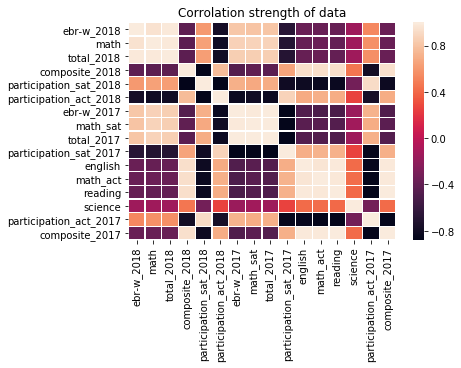

In [300]:
sns.heatmap(final_act_sat_2018_2017.corr(),fmt="d",linewidths=.25).set_title("Corrolation strength of data");

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [301]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel()# Ravel turns a matrix into a vector, which is easier to iterate
    plt.tight_layout()#this was found by pria throuhg noah
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

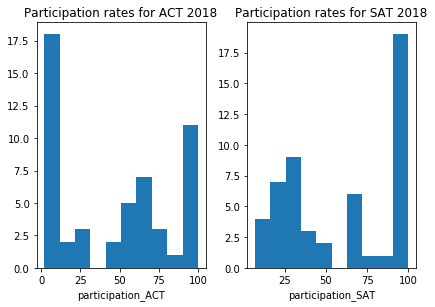

In [303]:
# Code
subplot_histograms(final_sat_act_2018,['participation_act','participation_sat'], ['Participation rates for ACT 2018','Participation rates for SAT 2018'],['participation_ACT','participation_SAT'] )



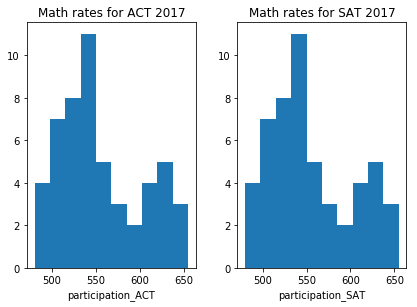

In [304]:
subplot_histograms(final_sat_act_2018,['math','math'], ['Math rates for ACT 2017','Math rates for SAT 2017'],['participation_ACT','participation_SAT'] )


TypeError: list indices must be integers or slices, not str

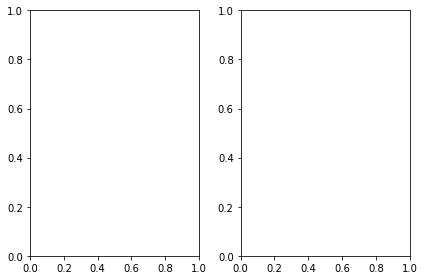

In [305]:
subplot_histograms(combined_act_sat,['ebr-w','reading'],['Math rates for ACT 2017','Math rates for SAT 2017'],['participation_ACT','participation_SAT'] )


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [315]:
combined_act_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 11 columns):
state                52 non-null object
ebr-w                51 non-null float64
math_sat             51 non-null float64
total                51 non-null float64
participation_sat    51 non-null float64
english              52 non-null float64
math_act             52 non-null float64
reading              52 non-null float64
science              52 non-null float64
participation_act    52 non-null float64
composite            52 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.9+ KB


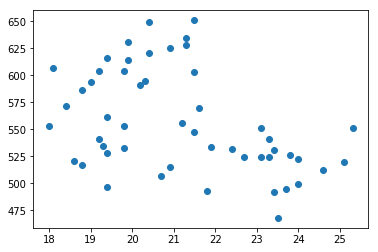

In [319]:
# Code
plt.scatter(combined_act_sat_2017['math_act'],combined_act_sat_2017['math_sat']);

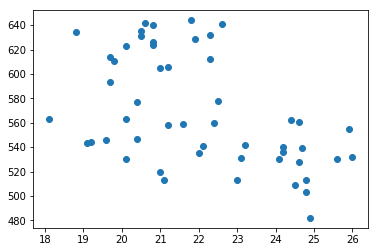

In [320]:
plt.scatter(combined_act_sat_2017['reading'],combined_act_sat_2017['ebr-w'])

In [316]:
combined_act_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 11 columns):
state                52 non-null object
ebr-w                51 non-null float64
math_sat             51 non-null float64
total                51 non-null float64
participation_sat    51 non-null float64
english              52 non-null float64
math_act             52 non-null float64
reading              52 non-null float64
science              52 non-null float64
participation_act    52 non-null float64
composite            52 non-null float64
dtypes: float64(10), object(1)
memory usage: 4.9+ KB


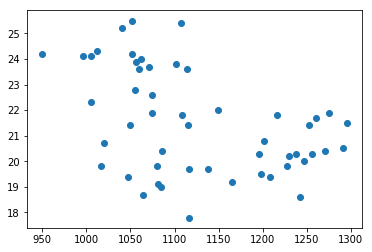

In [323]:

plt.scatter(combined_act_sat_2017['total'],combined_act_sat_2017['composite'])

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [310]:
# Code
def box_plots(dataframe):
    for i in dataframe:
        plt.figure()
        sns.boxplot(dataframe[i])


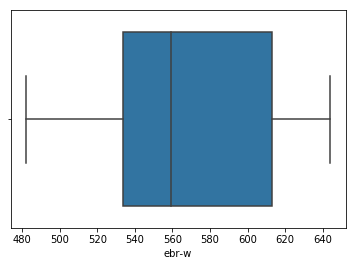

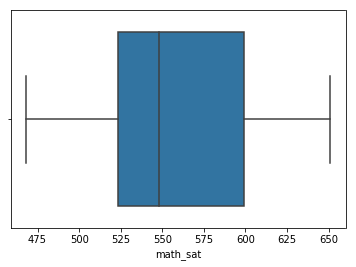

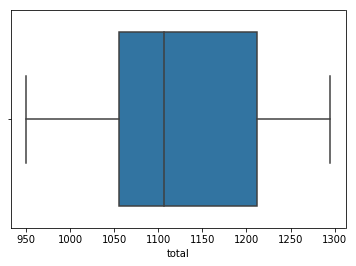

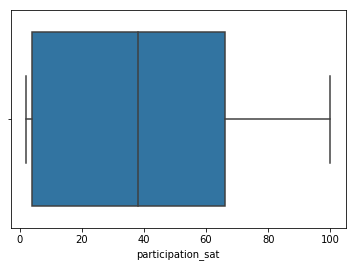

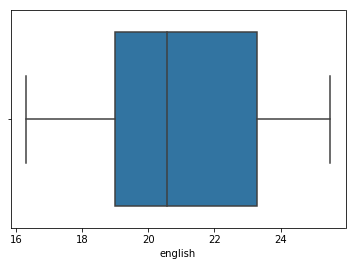

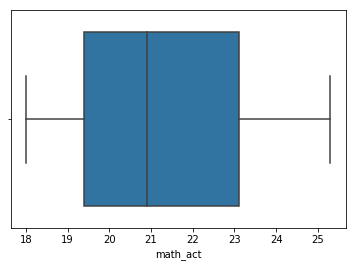

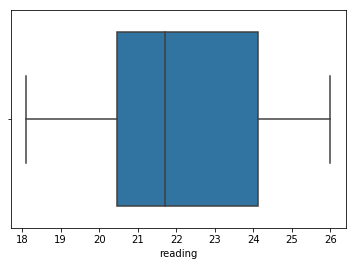

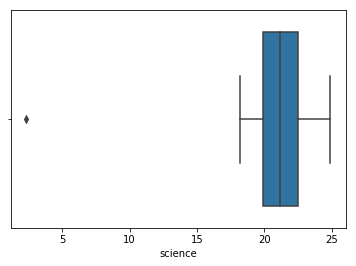

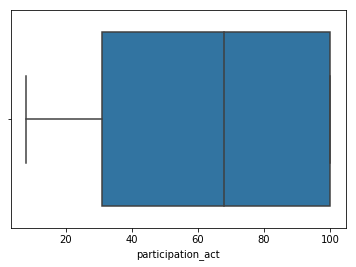

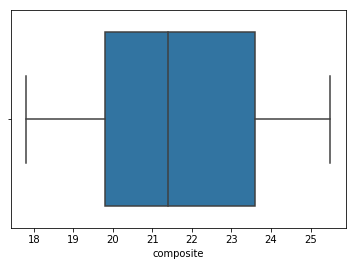

In [325]:
box_plots(combined_act_sat_2017.drop(columns = ['state']))

In [ ]:
final_act_sat_2018_2017.info()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

/Users/NickRead/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


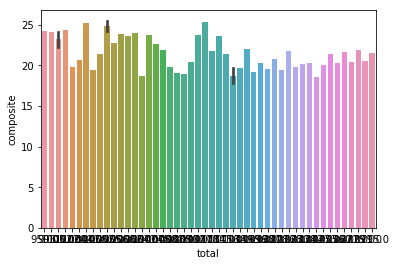

In [336]:
# sns.relplot(x=combined_act_sat_2017['total'], y=combined_act_sat_2017['composite'], kind="line", data=fmri);

sns.barplot(x= combined_act_sat_2017['total'], y=combined_act_sat_2017['composite']);

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [330]:
combined_act_sat= combined_act_sat_2017

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [331]:
combined_act_sat.describe()

,ebr-w,math_sat,total,participation_sat,english,math_act,reading,science,participation_act,composite
count,51.000000,51.000000,51.000000,51.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,569.117647,556.882353,1126.098039,39.803922,20.919231,21.173077,22.001923,21.040385,65.153846,21.509615
std,45.666901,47.121395,92.494812,35.276632,2.332132,1.963602,2.048672,3.151113,31.832518,2.002083
min,482.000000,468.000000,950.000000,2.000000,16.300000,18.000000,18.100000,2.300000,8.000000,17.800000
25%,533.500000,523.500000,1055.500000,4.000000,19.000000,19.400000,20.475000,19.900000,31.000000,19.800000
50%,559.000000,548.000000,1107.000000,38.000000,20.550000,20.900000,21.700000,21.150000,68.000000,21.400000
75%,613.000000,599.000000,1212.000000,66.000000,23.300000,23.100000,24.125000,22.525000,100.000000,23.600000
max,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,100.000000,25.500000


For the **ebr-w**, we have a total of 50 states and the District of Columbia accounted for in the row labeled 'count'.  The average participation rate (or the mean) is 39.8%, meaning that almost 40% of high school students took the 2017 SAT exam.  The standard deviation of 35.2 measures how far from the average the participating state is.  The minimum value (2%) represents the lowest participation rate recorded, while the maximum value represents the highest (100%).  The 25% represents the 1st quartile and 75% represents the 3rd quartile.  Quartiles represent how much higher you are than those below you.  the mean states that you participated more than 25% of states The 50% represents the middle number.

For the **math_sat**, we have a total of 50 states and the District of Columbia accounted for in the row labeled 'count'.  The average SAT Math score (or the mean) is 556, most of high school students that took the 2017 SAT exam.  The standard deviation of 47.1 measures how far from the average the participating state is.  The minimum value (468) represents the lowest math score recorded, while the maximum value represents the highest (651).  The 25% represents the 1st quartile and 75% represents the 3rd quartile.  Quartiles represent how much higher you are than those below you.  The 4% (Q1) states that you participated more than 25% of the states.  The 66% (Q3) represents an achievemet higher than 75% of participants.  The 50% represents the middle number.
For the **total**, we have a total of 50 states and the District of Columbia accounted for in the row labeled 'count'.  The average participation rate (or the mean) is 39.8%, meaning that almost 40% of high school students took the 2017 SAT exam.  The standard deviation of 35.2 measures how far from the average the participating state is.  The minimum value (2%) represents the lowest participation rate recorded, while the maximum value represents the highest (100%).  The 25% represents the 1st quartile and 75% represents the 3rd quartile.  Quartiles represent how much higher you are than those below you.  The 4% (Q1) states that you participated more than 25% of the states.  The 66% (Q3) represents an achievemet higher than 75% of participants.  The 50% represents the middle number.
For the **participation_sat**, we have a total of 50 states and the District of Columbia accounted for in the row labeled 'count'.  The average participation rate (or the mean) is 39.8%, meaning that almost 40% of high school students took the 2017 SAT exam.  The standard deviation of 35.2 measures how far from the average the participating state is.  The minimum value (2%) represents the lowest participation rate recorded, while the maximum value represents the highest (100%).  The 25% represents the 1st quartile and 75% represents the 3rd quartile.  Quartiles represent how much higher you are than those below you.  The 4% (Q1) states that you participated more than 25% of the states.  The 66% (Q3) represents an achievemet higher than 75% of participants.  The 50% represents the middle number.


**I ran out of time describing Each of these **

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No the data actually has a negative corolation, This asumption doesnt hold for Math or Reading like we would expect wich leads me to belive that the test structure is different rather than the students taking it 

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: I think this data is n 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Probably not we can make inferences about subgroups like states that requier either tests. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No beacuse the tests are so different we wouldnt want to draw conclusions because we arnt pulling from the same saple size. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

 North Carolina: I think its interesting how NC have similar rates of testing for both the SAT & ACT. When looking into the states polocies I can see that UNC chapple hill takes the ACT where as Duke prefers stuents take the SAT. Beacue theses schools are reuglarly applied to by students in the satae it would make sence that the students would take both tests to maximize there admissions chances.  

Florida: In Florida there is no requiered test for stuednts to take but it heavily prefers the SAT. This led me to belive that the universities must prefer acceptance to one or the other. however all of the flag ship universities reprot a roughtly equal number of tests considered University of Miami:51/50 UF:49/52 FSU:50/50. I am unsure why there is such a push for instate students to take the SAT over the ACT. 

Mississippi: With one of the lowest outcomes for the 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

 We can advise the College Board to work on providing more free tests on weekends in states that dont offer free ACT resources.

**BIB:**
University Of Florida Office Of Admissions
https://admissions.ufl.edu/

“Choosing a Test.” Choosing a Test | Duke TIP, https://tip.duke.edu/programs/7th-grade-talent-search/actsat-testing/choosing-test.

Admissions
https://welcome.miami.edu/admissions/